In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier
import lightgbm as lgb
import pickle


df = pd.read_csv('../data/train_data.csv')
test = pd.read_csv('../data/test_data.csv')

In [11]:
def split_data(X, y, frac: float = 0.2) -> tuple:
    """Splits data so that it returns a train / test split with a given fraction"""

    # cutoff point for training / test split
    idx_cutoff = int(X.shape[0] * (1 - frac))

    X_train, X_test, y_train, y_test = X.iloc[:idx_cutoff], X.iloc[idx_cutoff:], y.iloc[:idx_cutoff], y.iloc[idx_cutoff:]

    return X_train, X_test, y_train, y_test

In [4]:
col_list_train = list(df.columns)
col_list_train.remove('Diabetes')

dfX_train = df[col_list_train]
dfy_train = df['Diabetes']

X_train, X_test, y_train, y_test = split_data(dfX_train, dfy_train, 0.2)

In [21]:
stdScale = StandardScaler()
stdScale.fit_transform(X_train)
stdScale.transform(X_test)

#Set the minimum error arbitrarily large
min = 99999999999999999999999 
count = 0 #Used for keeping track of the iteration number
#How many runs to perform using randomly selected hyperparameters
iterations = 1000
for i in range(iterations):
    print('iteration number', count)
    count += 1 #increment count

    param = {} #initialize parameters
    param['learning_rate'] = np.random.uniform(0, 1)
    param['boosting_type'] = np.random.choice(['gbdt'])
    param['objective'] = 'binary'
    param['metric'] = 'logloss'
    param['feature_fraction'] = np.random.uniform(0, 1)
    param['num_leaves'] = np.random.randint(5, 300)
    param['min_data_in_leaf'] = np.random.randint(5, 200)
    param['max_depth'] = np.random.randint(5, 300)
    iterations = np.random.randint(10, 10000)
    print(param, iterations)#Train using selected parameters
    lgbm = LGBMClassifier(**param)
    lgbm.fit(X_train,y_train, eval_set = [(X_test, y_test) , (X_train, y_train)], eval_metric = 'logloss')
    prediction = lgbm.predict_proba(X_test)
    logloss = log_loss(y_true = y_test, y_pred = prediction)

    print('logloss:', logloss)
    if logloss < min:
        min = logloss
        pp = param

print("*" * 100)
print('Minimum is: ', min)
print('Used params', pp)

iteration number 0
{'learning_rate': 0.5585821575664682, 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'logloss', 'feature_fraction': 0.3029789710036317, 'num_leaves': 123, 'min_data_in_leaf': 10, 'max_depth': 80} 7967
[LightGBM] [Warning] feature_fraction is set=0.3029789710036317, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3029789710036317
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[1]	training's binary_logloss: 0.622467	valid_0's binary_logloss: 0.659991
[2]	training's binary_logloss: 0.577162	valid_0's binary_logloss: 0.59928
[3]	training's binary_logloss: 0.540904	valid_0's binary_logloss: 0.566064
[4]	training's binary_logloss: 0.533465	valid_0's binary_logloss: 0.560719
[5]	training's binary_logloss: 0.524683	valid_0's binary_logloss: 0.551133
[6]	training's binary_logloss: 0.506051	valid_0's binary_logloss: 0.546012
[7]	training's binary_logloss: 0.504018	vali

In [14]:
stdScale = StandardScaler()
stdScale.fit_transform(X_train)
stdScale.transform(X_test)

lgbm_train = LGBMClassifier(objective = "binary", learning_rate = 0.06392207372444492, boosting_type = 'gbdt', metric = 'logloss', feature_fraction = 0.3750172469399382, num_leaves = 38, min_data_in_leaf = 117, max_depth = 50)
lgbm_train.fit(X_train,y_train, eval_set = [(X_test, y_test) , (X_train, y_train)], eval_metric = 'logloss')
prediction = lgbm_train.predict_proba(X_test)
print(log_loss(y_true = y_test, y_pred = prediction))
# lgb.plot_importance(lgbm)
# print('Training accuracy {:.4f}'.format(lgbm.score(X_train,y_train)))
# print('Testing accuracy {:.4f}'.format(lgbm.score(X_test,y_test)))
prediction

[LightGBM] [Warning] feature_fraction is set=0.3750172469399382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3750172469399382
[LightGBM] [Warning] min_data_in_leaf is set=117, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=117
[1]	training's binary_logloss: 0.677141	valid_0's binary_logloss: 0.729646
[2]	training's binary_logloss: 0.663232	valid_0's binary_logloss: 0.713832
[3]	training's binary_logloss: 0.649998	valid_0's binary_logloss: 0.698743
[4]	training's binary_logloss: 0.642163	valid_0's binary_logloss: 0.68995
[5]	training's binary_logloss: 0.631423	valid_0's binary_logloss: 0.677623
[6]	training's binary_logloss: 0.622486	valid_0's binary_logloss: 0.667993
[7]	training's binary_logloss: 0.615602	valid_0's binary_logloss: 0.659262
[8]	training's binary_logloss: 0.608988	valid_0's binary_logloss: 0.651004
[9]	training's binary_logloss: 0.602529	valid_0's binary_logloss: 0.643194
[10]	training's binary_logloss: 0.595429	valid_0

array([[0.63197058, 0.36802942],
       [0.17996205, 0.82003795],
       [0.16849733, 0.83150267],
       ...,
       [0.88758575, 0.11241425],
       [0.85436927, 0.14563073],
       [0.83270302, 0.16729698]])

In [23]:
# now train over train + test
stdScale = StandardScaler()
stdScale.fit_transform(dfX_train)
stdScale.transform(test)



lgbm = LGBMClassifier(objective = "binary", learning_rate = 0.06392207372444492, boosting_type = 'gbdt', metric = 'logloss', feature_fraction = 0.3750172469399382, num_leaves = 38, min_data_in_leaf = 117, max_depth = 50)
lgbm.fit(dfX_train,dfy_train, eval_metric = 'logloss')
prediction = lgbm.predict_proba(test)
# print(log_loss(y_true = y_test, y_pred = prediction))
# lgb.plot_importance(lgbm)
# print('Training accuracy {:.4f}'.format(lgbm.score(X_train,y_train)))
# print('Testing accuracy {:.4f}'.format(lgbm.score(X_test,y_test)))
prediction
# submission_df = pd.DataFrame(prediction, columns = ['Diabetes',''])
# # submission_df["id"] = submission_df.index
# submission_df

submission_df = pd.DataFrame({'id' : range(0,len(prediction)), 'Diabetes' : prediction[:,1]})
# # submission_df["id"] = submission_df.index
submission_df.to_csv('Diabetes_submission.csv',index=None)
submission_df

[LightGBM] [Warning] feature_fraction is set=0.3750172469399382, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3750172469399382
[LightGBM] [Warning] min_data_in_leaf is set=117, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=117


id  Diabetes
0          0  0.827996
1          1  0.833935
2          2  0.873471
3          3  0.165168
4          4  0.163923
...      ...       ...
19995  19995  0.488350
19996  19996  0.466856
19997  19997  0.589789
19998  19998  0.139713
19999  19999  0.317042

[20000 rows x 2 columns]

<AxesSubplot: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

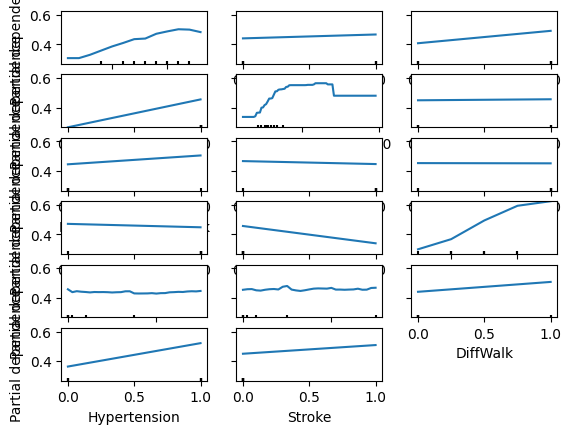

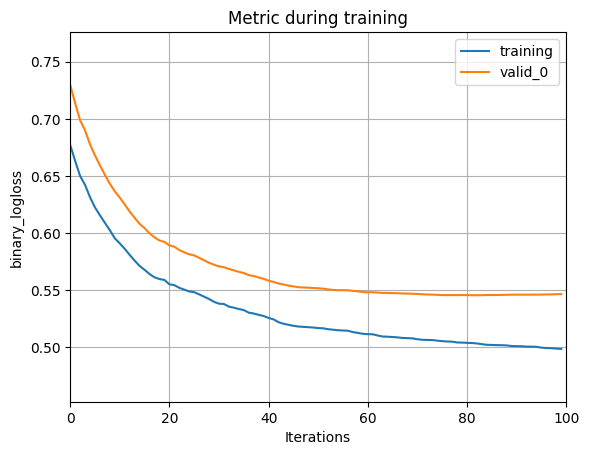

In [9]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
results = partial_dependence(lgbm_train, X_train, ['BMI'] )
PartialDependenceDisplay.from_estimator(lgbm_train, X_train, col_list_train, kind = 'average')
lgb.plot_metric(lgbm_train)

In [24]:
filename = 'diabetes_lgbm_model.pkl'
pickle.dump(lgbm, open(filename, 'wb'))

filename = 'diabetes_stdScale_model.pkl'
pickle.dump(stdScale, open(filename, 'wb'))